# Neural Network Lab-8




In [2]:
%pip install matplotlib seaborn scikit-learn tensorflow --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)
print("All libraries imported successfully!")

Note: you may need to restart the kernel to use updated packages.


/Users/zenith/AIML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow version: 2.19.0
All libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('enhanced_student_habits_performance_dataset.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (80000, 31)

First few rows:
   student_id  age  gender             major  study_hours_per_day  \
0      100000   26    Male  Computer Science             7.645367   
1      100001   28    Male              Arts             5.700000   
2      100002   17    Male              Arts             2.400000   
3      100003   27   Other        Psychology             3.400000   
4      100004   25  Female          Business             4.700000   

   social_media_hours  netflix_hours part_time_job  attendance_percentage  \
0                 3.0            0.1           Yes                   70.3   
1                 0.5            0.4            No                   88.4   
2                 4.2            0.7            No                   82.1   
3                 4.6            2.3           Yes                   79.3   
4                 0.8            2.7           Yes                   62.9   

   sleep_hours  ... screen_time  study_environment access_to_tutoring  \
0    

In [4]:
# 1. Perform Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Dataset Description:")
print(df.describe())
print("\n" + "="*50)
print("Missing values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].dtype == 'object':
        print(f"  Values: {df[col].unique()[:5]}...")  # Show first 5 unique values
    print()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       8

In [9]:
# 2. Encoding Categorical Variables and prepare independent/dependent variables

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print(f"Target column: {target_col}")

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Encode categorical variables (except target variable)
label_encoders = {}
for col in categorical_cols:
    if col != target_col:  # Don't encode target variable yet
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {le.classes_}")

# Handle target variable
if df_processed[target_col].dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(df_processed[target_col])
    print(f"\nTarget classes: {le_target.classes_}")
    print(f"Encoded target: {dict(zip(le_target.classes_, range(len(le_target.classes_))))}")
else:
    y = df_processed[target_col].values

# Prepare feature matrix (X)
X = df_processed.drop(columns=[target_col])

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

Categorical columns: ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']
Numerical columns: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score']
Target column: exam_score
Encoded gender: ['Female' 'Male' 'Other']
Encoded major: ['Arts' 'Biology' 'Business' 'Computer Science' 'Engineering' 'Psychology']
Encoded part_time_job: ['No' 'Yes']
Encoded diet_quality: ['Fair' 'Good' 'Poor']
Encoded parental_education_level: ['Bachelor' 'High School' 'Master' 'PhD' 'Some College']
Encoded internet_quality: ['High' 'Low' 

In [ ]:
# 2. Split dataset into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set - Features: {X_train.shape}, Target: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape}, Target: {y_test.shape}")
print(f"\nTarget variable statistics:")
print(f"Training set - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Testing set - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")
print(f"Full dataset - Min: {y.min():.2f}, Max: {y.max():.2f}")

Training set - Features: (64000, 30), Target: (64000,)
Testing set - Features: (16000, 30), Target: (16000,)

Target variable statistics:
Training set - Mean: 89.15, Std: 11.58
Testing set - Mean: 89.09, Std: 11.64
Full dataset - Min: 36.00, Max: 100.00


In [11]:
# 3. Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Original training data shape: {X_train.shape}")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"\nBefore scaling - Feature means:")
print(X_train.mean().round(3))
print(f"\nAfter scaling - Feature means (should be ~0):")
print(np.round(X_train_scaled.mean(axis=0), 3))
print(f"\nAfter scaling - Feature standard deviations (should be ~1):")
print(np.round(X_train_scaled.std(axis=0), 3))

Feature scaling completed!
Original training data shape: (64000, 30)
Scaled training data shape: (64000, 30)

Before scaling - Feature means:
student_id                       139951.276
age                                  22.015
gender                                0.998
major                                 2.501
study_hours_per_day                   4.175
social_media_hours                    2.500
netflix_hours                         1.997
part_time_job                         0.498
attendance_percentage                69.968
sleep_hours                           7.018
diet_quality                          0.833
exercise_frequency                    3.517
parental_education_level              2.000
internet_quality                      0.997
mental_health_rating                  6.801
extracurricular_participation         0.499
previous_gpa                          3.603
semester                              4.492
stress_level                          5.015
dropout_risk          

In [12]:
# Determine problem type and setup for neural network
n_classes = len(np.unique(y))
is_binary_classification = n_classes == 2
is_multiclass_classification = n_classes > 2 and n_classes <= 10
is_regression = n_classes > 10

print(f"Number of unique target values: {n_classes}")
if is_binary_classification:
    problem_type = "Binary Classification"
    output_neurons = 1
    output_activation = 'sigmoid'
    loss_function = 'binary_crossentropy'
    metrics = ['accuracy']
elif is_multiclass_classification:
    problem_type = "Multiclass Classification"
    output_neurons = n_classes
    output_activation = 'softmax'
    loss_function = 'sparse_categorical_crossentropy'
    metrics = ['accuracy']
else:
    problem_type = "Regression"
    output_neurons = 1
    output_activation = 'linear'
    loss_function = 'mean_squared_error'
    metrics = ['mae']

print(f"Problem type: {problem_type}")
print(f"Output layer: {output_neurons} neuron(s) with {output_activation} activation")
print(f"Loss function: {loss_function}")
print(f"Metrics: {metrics}")

Number of unique target values: 65
Problem type: Regression
Output layer: 1 neuron(s) with linear activation
Loss function: mean_squared_error
Metrics: ['mae']


In [ ]:
# 4. Initialize Artificial Neural Network with 2 hidden layers and 6 neurons each
# Model 1: Using ReLU (Rectified Linear Unit) activation function

model_relu = Sequential([
    Dense(6, activation='relu', input_shape=(X_train_scaled.shape[1],), name='hidden_layer_1_relu'),
    Dense(6, activation='relu', name='hidden_layer_2_relu'),
    Dense(output_neurons, activation=output_activation, name='output_layer')
], name='ANN_ReLU')

print("Model 1 - ReLU Activation Function:")
model_relu.summary()

Model 1 - ReLU Activation Function:


Model: "ANN_ReLU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1_relu (Dense)     │ (None, 6)              │           186 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2_relu (Dense)     │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Model 2: Using tanh activation function

model_tanh = Sequential([
    Dense(6, activation='tanh', input_shape=(X_train_scaled.shape[1],), name='hidden_layer_1_tanh'),
    Dense(6, activation='tanh', name='hidden_layer_2_tanh'),
    Dense(output_neurons, activation=output_activation, name='output_layer')
], name='ANN_tanh')

print("Model 2 - tanh Activation Function:")
model_tanh.summary()

Model 2 - tanh Activation Function:


Model: "ANN_tanh"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1_tanh (Dense)     │ (None, 6)              │           186 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2_tanh (Dense)     │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Model 3: Using sigmoid activation function

model_sigmoid = Sequential([
    Dense(6, activation='sigmoid', input_shape=(X_train_scaled.shape[1],), name='hidden_layer_1_sigmoid'),
    Dense(6, activation='sigmoid', name='hidden_layer_2_sigmoid'),
    Dense(output_neurons, activation=output_activation, name='output_layer')
], name='ANN_sigmoid')

print("Model 3 - Sigmoid Activation Function:")
model_sigmoid.summary()

Model 3 - Sigmoid Activation Function:


Model: "ANN_sigmoid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1_sigmoid (Dense)  │ (None, 6)              │           186 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2_sigmoid (Dense)  │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 6. Compile the neural networks with appropriate optimizer, loss function and metrics

models = {
    'ReLU': model_relu,
    'tanh': model_tanh,
    'sigmoid': model_sigmoid
}

# Compile all models
for name, model in models.items():
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=loss_function,
        metrics=metrics
    )
    print(f"\n{name} model compiled successfully!")
    print(f"  - Optimizer: Adam (learning_rate=0.001)")
    print(f"  - Loss function: {loss_function}")
    print(f"  - Metrics: {metrics}")


ReLU model compiled successfully!
  - Optimizer: Adam (learning_rate=0.001)
  - Loss function: mean_squared_error
  - Metrics: ['mae']

tanh model compiled successfully!
  - Optimizer: Adam (learning_rate=0.001)
  - Loss function: mean_squared_error
  - Metrics: ['mae']

sigmoid model compiled successfully!
  - Optimizer: Adam (learning_rate=0.001)
  - Loss function: mean_squared_error
  - Metrics: ['mae']


In [17]:
# 7. Fit the neural networks with batch_size=32 & epochs=100

print("Starting training for all models...")
print("This may take a few minutes...")

histories = {}
trained_models = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name} model...")
    print(f"{'='*50}")
    
    history = model.fit(
        X_train_scaled, y_train,
        batch_size=32,
        epochs=100,
        validation_split=0.2,
        verbose=1,
        shuffle=True
    )
    
    histories[name] = history
    trained_models[name] = model
    
    print(f"\n{name} model training completed!")

Starting training for all models...
This may take a few minutes...

Training ReLU model...
Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 4483.7778 - mae: 59.0026 - val_loss: 249.0312 - val_mae: 12.7495
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 4483.7778 - mae: 59.0026 - val_loss: 249.0312 - val_mae: 12.7495
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - loss: 194.5392 - mae: 11.1496 - val_loss: 88.0651 - val_mae: 7.4707
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - loss: 194.5392 - mae: 11.1496 - val_loss: 88.0651 - val_mae: 7.4707
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: 68.5965 - mae: 6.4734 - val_loss: 32.1948 - val_mae: 4.3282
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: 68.5965 - mae: 6.4734 - val_loss: 32.1948 - val_mae: 4.3282
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - loss: 28.6813 - mae: 4.0754 - val_loss: 20.9977 - val_mae: 3.3962
Epoch 5/100
1600/160

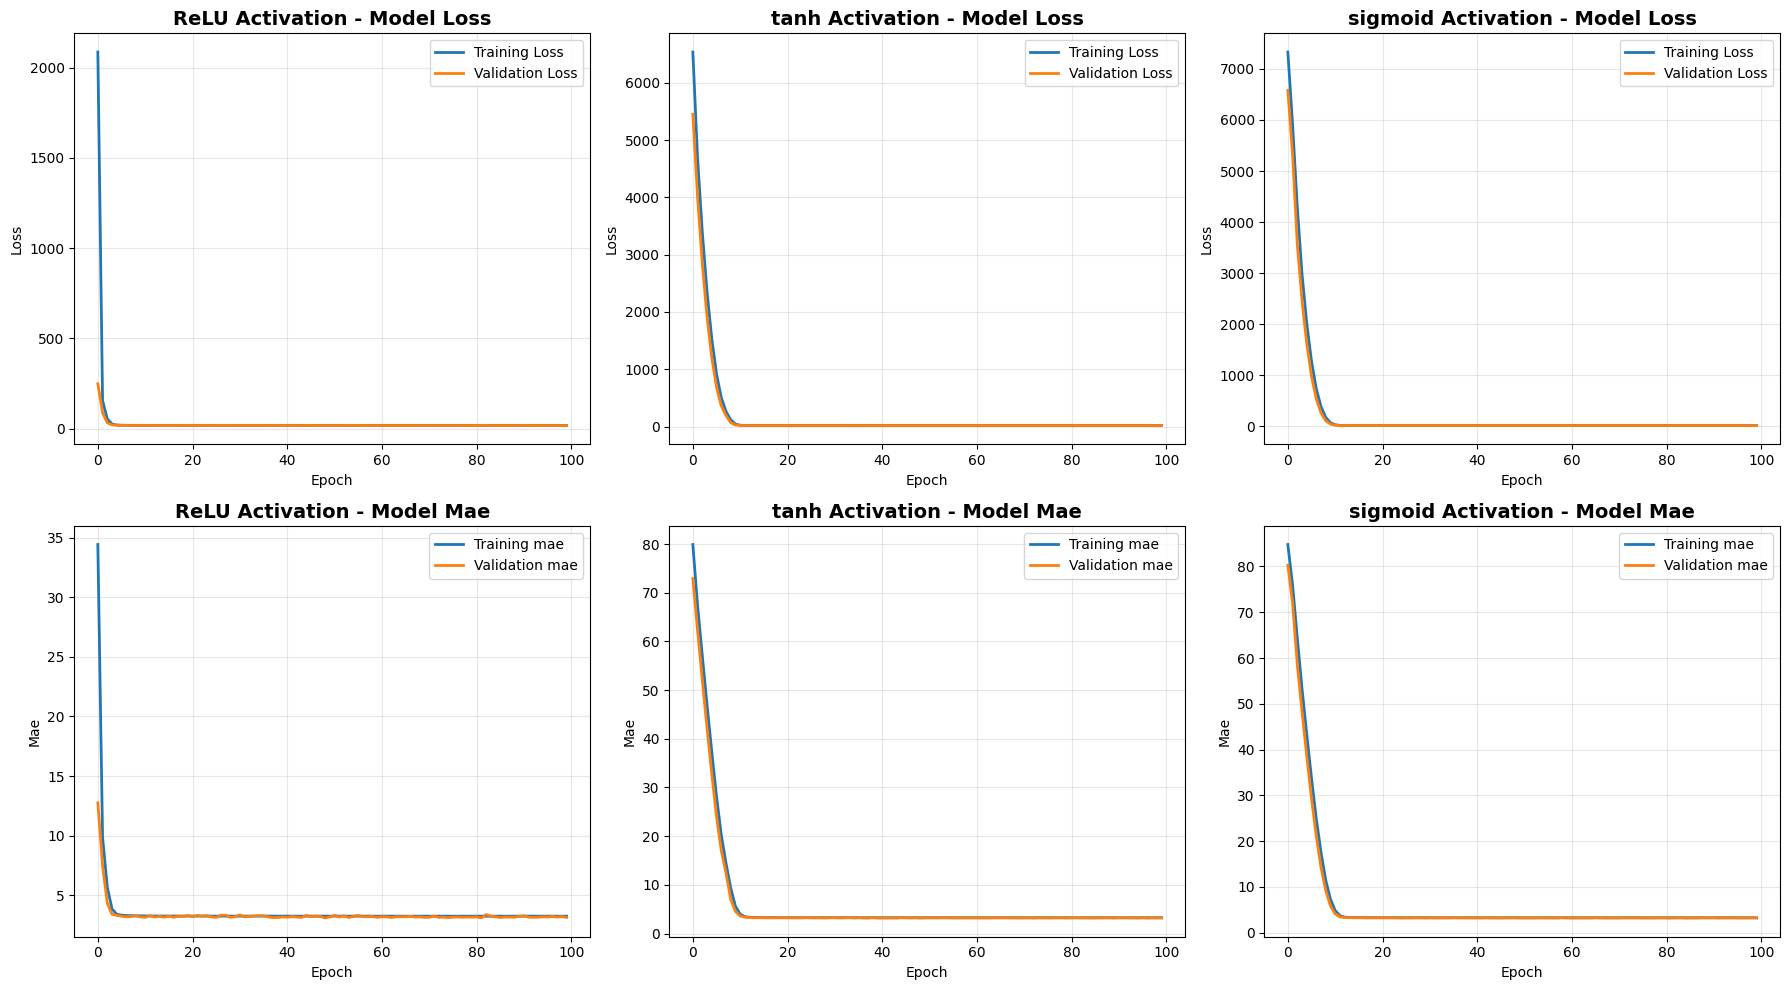

In [18]:
# Plot training history for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (name, history) in enumerate(histories.items()):
    # Plot training & validation loss
    axes[0, i].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, i].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, i].set_title(f'{name} Activation - Model Loss', fontsize=14, fontweight='bold')
    axes[0, i].set_xlabel('Epoch')
    axes[0, i].set_ylabel('Loss')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Plot training & validation metric (accuracy or mae)
    metric_name = metrics[0]
    axes[1, i].plot(history.history[metric_name], label=f'Training {metric_name}', linewidth=2)
    axes[1, i].plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name}', linewidth=2)
    axes[1, i].set_title(f'{name} Activation - Model {metric_name.capitalize()}', fontsize=14, fontweight='bold')
    axes[1, i].set_xlabel('Epoch')
    axes[1, i].set_ylabel(metric_name.capitalize())
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Model Evaluation and Comparison
print("="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)

best_model_name = None
best_score = -np.inf if 'accuracy' in metrics else np.inf

evaluation_results = {}

for name, model in trained_models.items():
    print(f"\n{name} Model Evaluation:")
    print("-" * 30)
    
    # Evaluate on test set
    test_loss, test_metric = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled, verbose=0)
    
    if is_binary_classification:
        y_pred_binary = (y_pred > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_test, y_pred_binary)
        
        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
        
        # Update best model
        if accuracy > best_score:
            best_score = accuracy
            best_model_name = name
            
    elif is_multiclass_classification:
        y_pred_classes = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_test, y_pred_classes)
        
        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
        
        # Update best model
        if accuracy > best_score:
            best_score = accuracy
            best_model_name = name
            
    else:  # Regression
        mae = test_metric
        print(f"Test Loss (MSE): {test_loss:.4f}")
        print(f"Test MAE: {mae:.4f}")
        
        # Update best model (lower is better for regression)
        if test_loss < best_score:
            best_score = test_loss
            best_model_name = name
    
    evaluation_results[name] = {
        'loss': test_loss,
        'metric': test_metric,
        'predictions': y_pred
    }

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"BEST SCORE: {best_score:.4f}")
print(f"{'='*60}")

MODEL EVALUATION RESULTS

ReLU Model Evaluation:
------------------------------
Test Loss (MSE): 17.7320
Test MAE: 3.1798

tanh Model Evaluation:
------------------------------
Test Loss (MSE): 17.7320
Test MAE: 3.1798

tanh Model Evaluation:
------------------------------
Test Loss (MSE): 17.5487
Test MAE: 3.2542

sigmoid Model Evaluation:
------------------------------
Test Loss (MSE): 17.5487
Test MAE: 3.2542

sigmoid Model Evaluation:
------------------------------
Test Loss (MSE): 17.4107
Test MAE: 3.2373

BEST MODEL: sigmoid
BEST SCORE: 17.4107
Test Loss (MSE): 17.4107
Test MAE: 3.2373

BEST MODEL: sigmoid
BEST SCORE: 17.4107


Detailed Regression Metrics for sigmoid Model:
Mean Squared Error (MSE): 17.4107
Root Mean Squared Error (RMSE): 4.1726
R² Score: 0.8714


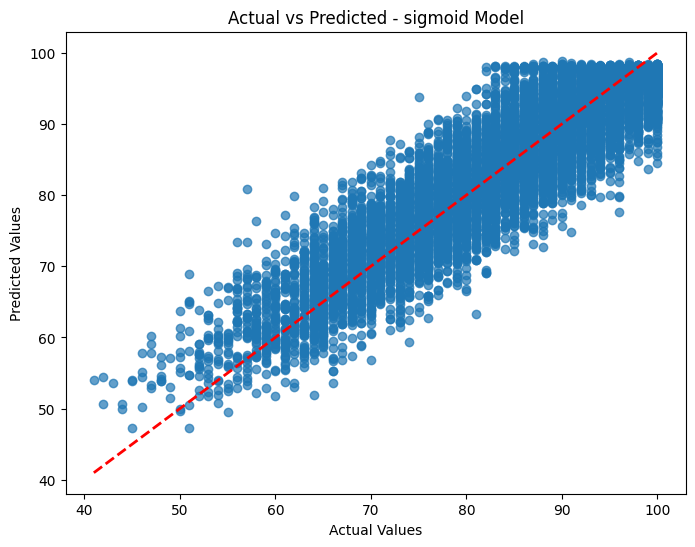

In [20]:
# Detailed analysis of the best model
best_model = trained_models[best_model_name]
y_pred_best = evaluation_results[best_model_name]['predictions']

if is_binary_classification or is_multiclass_classification:
    if is_binary_classification:
        y_pred_classes = (y_pred_best > 0.5).astype(int).flatten()
    else:
        y_pred_classes = np.argmax(y_pred_best, axis=1)
    
    print(f"Detailed Classification Report for {best_model_name} Model:")
    print("="*60)
    print(classification_report(y_test, y_pred_classes))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in range(len(np.unique(y)))],
                yticklabels=[f'Class {i}' for i in range(len(np.unique(y)))])
    plt.title(f'Confusion Matrix - {best_model_name} Model', fontsize=14, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

else:  # Regression
    # Calculate additional regression metrics
    from sklearn.metrics import mean_squared_error, r2_score
    
    mse = mean_squared_error(y_test, y_pred_best)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_best)
    
    print(f"Detailed Regression Metrics for {best_model_name} Model:")
    print("="*60)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Scatter plot of actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_best, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {best_model_name} Model')
    plt.show()